#### Topics:
- Loss vs Cost Function
- Solvers in Linear Regression
- Logistic Regression
- Paremeters in Linear regression
- Evaluation Metrics

### Loss Function vs Cost Function

##### Loss Function
Definition: The loss function, also known as the **error function**, measures the error for a single training example. It quantifies how well or poorly the model is performing for a specific instance.

Purpose: It provides feedback on the difference between the predicted output and the actual output for one instance.


For example, in regression problems, a common loss function is the Mean Squared Error (MSE): $$ L(y, \hat{y}) = (y - \hat{y})^2 $$

In classification problems, a common loss function is the Cross-Entropy Loss: $$ L(y, \hat{y}) = -\left[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\right] $$

##### Cost Function
Definition: The cost function, also known as the **objective function**, is the aggregate of the loss functions over the entire training dataset. It is a measure of the overall performance of the model.

Purpose: It provides a single value representing the model's performance across all training examples, which is then minimized during the training process.

Example: The cost function in linear regression is the average of the MSE for all training examples.

For example, the cost function for Mean Squared Error over 
𝑚
 training examples is: $$ J(\theta) = \frac{1}{m} \sum_{i=1}^m (y^{(i)} - \hat{y}{(i)})2 $$

For Cross-Entropy Loss, the cost function is: $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\right] $$

### Types of Linear regression offered by sklearn

In [2]:
import sklearn.linear_model as linear_models

[i for i in dir(linear_models) if i.endswith('Regressor') or i.endswith('Regression')]

['ARDRegression',
 'GammaRegressor',
 'HuberRegressor',
 'LinearRegression',
 'LogisticRegression',
 'PassiveAggressiveRegressor',
 'PoissonRegressor',
 'QuantileRegressor',
 'RANSACRegressor',
 'SGDRegressor',
 'TheilSenRegressor',
 'TweedieRegressor']

### How does Linear Regression Compute m:

1. Entire dataframe has X values which are columns/features and y values that is target. y=mx+c or y=𝜃X+𝜃o
2. Divide Dataframe into Training dataframe and test/validation dataframe
3. Use training dataframe to compute m or theta values which is a matrix of intercepts
4. In linear regression, we want to find the parameter vector 
𝜃 or m that minimizes the cost function. This is done by solving the normal equation: $$ \theta = (X^TX)^{-1}X^Ty $$

Where:
- 𝑋 is the matrix of input features, with each row representing a data point and each column representing a feature.
- 𝑦 is the vector of target values.
- 𝜃 is the vector of parameters we're trying to find.

4. Compute $$𝑋^𝑇𝑋$$ : This step involves multiplying the transpose of the input matrix 𝑋 by 𝑋 itself.
5. Invert $$𝑋^T𝑋$$ : Inverting this product matrix is the most computationally intensive part. The inverse of a matrix is a matrix $$𝐴^−1$$
such that $$𝐴⋅𝐴^−1=𝐼$$
, where 
𝐼
 is the identity matrix.

6. Compute 
𝑋
𝑇
𝑦
: This step involves multiplying the transpose of 
𝑋
 by the vector 
𝑦
.

7. Multiply the Inverse by 
𝑋^𝑇𝑦 : Finally, we multiply the inverted matrix from step 2 by the result of step 3 to get the parameter vector 𝜃

8. Then once you have matrix of  m values, use them to multiply in the equation: y=mX+c, hHere y is predicted y

In [10]:
import numpy as np

# Generating synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Adding bias term (intercept)
X_b = np.c_[np.ones((100, 1)), X]

# Computing the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Optimal parameters (theta):", theta_best)


Optimal parameters (theta): [[4.22215108]
 [2.96846751]]


### Solvers in Linear Regression

In the context of linear regression, solvers are optimization algorithms used to fit the model to the data by minimizing the cost function. 
Different solvers have different characteristics and are suitable for various types of problems. Here are some of the common solvers used in linear regression:

#### 1. Ordinary Least Squares (OLS):

Description: The most common method for linear regression. It minimizes the sum of squared residuals (errors) between the observed and predicted values.


The complexity of Ordinary Least Squares (OLS) regression, particularly in terms of computational time, depends on several factors, primarily related to the size of the dataset.

**Computational Complexity**
1. **Matrix Inversion**: The most computationally intensive step in OLS is solving the normal equations to find the optimal parameters 
𝜃 : $$ \theta = (X^TX)^{-1}X^Ty $$

The complexity of this matrix inversion is typically 
$$𝑂(𝑛^3)$$
, where 
𝑛
 is the number of features (or predictors).

2. **Matrix Multiplication**:
The other operations (like calculating 
𝑋
𝑇
𝑋
 and 
𝑋
𝑇
𝑦
) involve matrix multiplication, which has a complexity of 
$$𝑂(𝑚𝑛^2)$$
, where 
𝑚
 is the number of data points and 
𝑛
 is the number of features.

**Overall Complexity**

Combining these, the overall computational complexity for OLS regression is generally dominated by the matrix inversion step, resulting in:

$$O(n^3+mn^2)$$

This means that for very large datasets with many features, the computational requirements can become significant.

#### Practical Considerations

- Small Datasets: For datasets with a small number of features (even with a large number of data points), the computation is relatively manageable.

- Large Datasets: For datasets with a large number of features, more efficient algorithms like Gradient Descent or specialized methods like Stochastic Gradient Descent (SGD) might be preferable, as they do not require matrix inversion.

Mean squared error: 2548.07
Coefficient of determination: 0.47


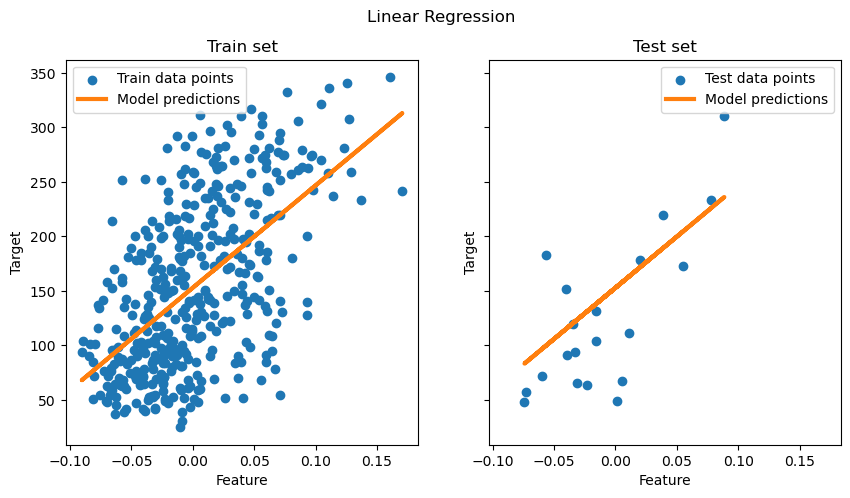

In [1]:
"""
==============================
Ordinary Least Squares Example
==============================

This example shows how to use the ordinary least squares (OLS) model
called :class:`~sklearn.linear_model.LinearRegression` in scikit-learn.

For this purpose, we use a single feature from the diabetes dataset and try to
predict the diabetes progression using this linear model. We therefore load the
diabetes dataset and split it into training and test sets.

Then, we fit the model on the training set and evaluate its performance on the test
set and finally visualize the results on the test set.
"""

# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# %%
# Data Loading and Preparation
# ----------------------------
#
# Load the diabetes dataset. For simplicity, we only keep a single feature in the data.
# Then, we split the data and target into training and test sets.
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

# %%
# Linear regression model
# -----------------------
#
# We create a linear regression model and fit it on the training data. Note that by
# default, an intercept is added to the model. We can control this behavior by setting
# the `fit_intercept` parameter.
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

# %%
# Model evaluation
# ----------------
#
# We evaluate the model's performance on the test set using the mean squared error
# and the coefficient of determination.
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

# %%
# Plotting the results
# --------------------
#
# Finally, we visualize the results on the train and test data.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

# %%
# Conclusion
# ----------
#
# The trained model corresponds to the estimator that minimizes the mean squared error
# between the predicted and the true target values on the training data. We therefore
# obtain an estimator of the conditional mean of the target given the data.
#
# Note that in higher dimensions, minimizing only the squared error might lead to
# overfitting. Therefore, regularization techniques are commonly used to prevent this
# issue, such as those implemented in :class:`~sklearn.linear_model.Ridge` or
# :class:`~sklearn.linear_model.Lasso`.


#### 2. Gradient Descent

Description: An iterative optimization algorithm used to minimize the cost function by updating the model parameters in the opposite direction of the gradient of the cost function.

- Because the time complexity of matrix inversion and multiplication is very high and cannot be used on large datasets, the methods for finding and updating slope and intercept (m & c or beta and beta_0 or theta and theta_0) use gradient descent.

#### Steps involved in gradient descent:

1. Initialization: Start by initializing the parameters (weights and biases) randomly or using some heuristics.

2. Compute the Prediction:
Use the current parameters to predict the output of the model. For example, in linear regression, this would be 
𝑦^=𝑋⋅𝜃, where 𝑦^ is the predicted value, 
𝑋 is the input data, and 
𝜃 is the parameter vector.

3. Calculate the Loss:
Compute the loss function, which measures the difference between the predicted output and the actual output. Common loss functions include Mean Squared Error (MSE) for regression and Cross-Entropy Loss for classification.

Mean Squared Error (MSE): $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y{(i)})2 $$

3. Compute the Gradient:
Calculate the gradient of the loss function with respect to each parameter. The gradient is a vector of partial derivatives, which indicates the direction of the steepest ascent. For example, in MSE, the gradient with respect to 
𝜃 is $$∇𝜃𝐽(𝜃)=(1/𝑚)𝑋^𝑇(𝑋⋅𝜃−𝑦)$$

4. Update Rule: Parameters are updated using the gradient of the cost function: $$ \theta := \theta - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} $$ Where 𝛼 is the learning rate. or $$𝜃𝑡+1=𝜃𝑡−𝜂∇𝜃𝐽(𝜃𝑡) $$

5. Repeat:
Repeat steps 2-5 for a set number of iterations or until the loss converges to a minimum (i.e., the changes in loss are below a predefined threshold).

6. (Optional) Stochastic Variants:
Instead of using the entire dataset to compute the gradient, you can use a subset (mini-batch) or a single example. This leads to variants like Stochastic Gradient Descent (SGD) and Mini-batch Gradient Descent.

Note:
- Complexity: More scalable to large datasets since it does not require matrix inversion. The complexity is driven by the number of iterations and data size.

- Data Requirements: Can handle large datasets and high-dimensional feature spaces. It is particularly useful when the input matrix 𝑋 is not invertible or has multicollinearity issues.

- Flexibility: Can be adapted to different optimization problems by changing the cost function or update rule.

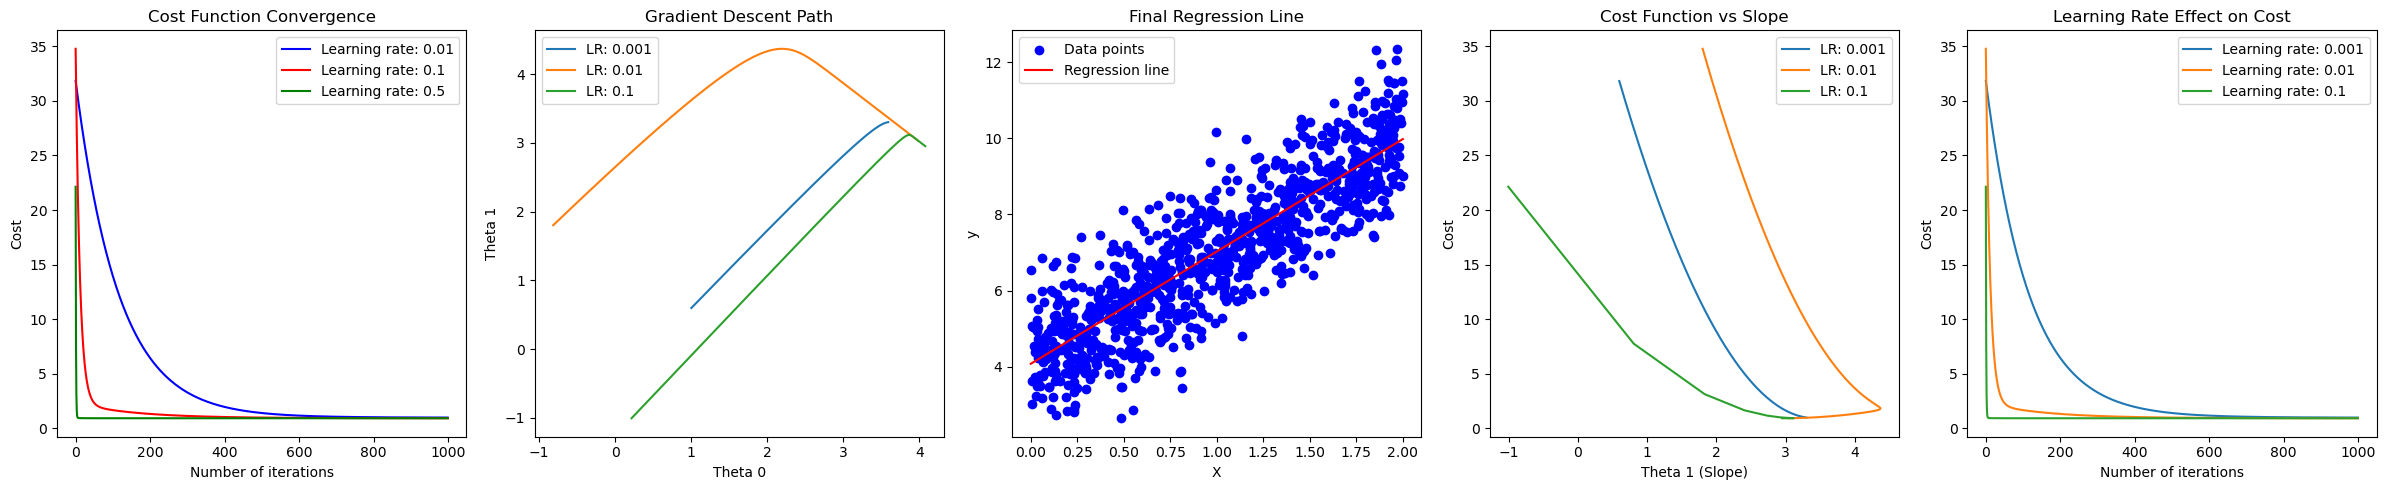

Optimal parameters (theta) with learning rate 0.01: [[3.58989072]
 [3.30135386]]
Optimal parameters (theta) with learning rate 0.1: [[3.97738839]
 [3.0363888 ]]
Optimal parameters (theta) with learning rate 0.5: [[4.07716725]
 [2.95148117]]


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(0)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Adding a bias term (intercept)
X_b = np.c_[np.ones((1000, 1)), X]

# Initializing parameters
learning_rates = [0.001, 0.01, 0.1]
n_iterations = 1000
m = len(X_b)

# Function to perform Gradient Descent
def gradient_descent(X_b, y, learning_rate, n_iterations):
    theta = np.random.randn(2, 1)
    cost_history = []
    theta_path = np.array([theta]).reshape(1, -1)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y)**2)
        cost_history.append(cost)
        theta_path = np.vstack([theta_path, theta.T])
    return theta, cost_history, theta_path

# Performing Gradient Descent for different learning rates
results = []
for lr in learning_rates:
    theta, cost_history, theta_path = gradient_descent(X_b, y, lr, n_iterations)
    results.append((theta, cost_history, theta_path))

# Predictions using the last set of optimized parameters
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(results[-1][0])  # Using the last set of parameters

# Plotting
plt.figure(figsize=(24, 5))

# Cost function convergence
plt.subplot(1, 5, 1)
plt.plot(range(n_iterations), results[0][1], 'b-', label='Learning rate: 0.01')
plt.plot(range(n_iterations), results[1][1], 'r-', label='Learning rate: 0.1')
plt.plot(range(n_iterations), results[2][1], 'g-', label='Learning rate: 0.5')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()

# Gradient descent path
plt.subplot(1, 5, 2)
for lr, result in zip(learning_rates, results):
    plt.plot(result[2][:, 0], result[2][:, 1], label=f'LR: {lr}')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Gradient Descent Path')
plt.legend()

# Final regression line
plt.subplot(1, 5, 3)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_predict, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Regression Line')
plt.legend()

# Cost function vs slope
plt.subplot(1, 5, 4)
for lr, result in zip(learning_rates, results):
    plt.plot(result[2][:1000, 1], result[1], label=f'LR: {lr}')
plt.xlabel('Theta 1 (Slope)')
plt.ylabel('Cost')
plt.title('Cost Function vs Slope')
plt.legend()

# Learning rate effect on cost
plt.subplot(1, 5, 5)
for lr, result in zip(learning_rates, results):
    plt.plot(range(n_iterations), result[1], label=f'Learning rate: {lr}')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Learning Rate Effect on Cost')
plt.legend()

plt.tight_layout()
plt.show()

print("Optimal parameters (theta) with learning rate 0.01:", results[0][0])
print("Optimal parameters (theta) with learning rate 0.1:", results[1][0])
print("Optimal parameters (theta) with learning rate 0.5:", results[2][0])


**Key Points**:

  1. Gradient Descent computes the gradient of the cost function with respect to the parameters by using the entire training dataset. This means that for each update of the parameters, Gradient Descent processes all training examples.
     
  2. Update Rule: The update rule for the parameters in Gradient Descent is: $$ \theta := \theta - \alpha \cdot \nabla J(\theta) $$ where 
∇𝐽(𝜃) is the gradient of the cost function with respect to 𝜃 , and 𝛼  is the learning rate.

3. Convergence: Due to using the entire dataset for each update, Gradient Descent tends to have a smooth path towards convergence.
    However, it can be slow, especially for large datasets, since it requires processing all data points at each iteration.

4. Complexity:
The computational complexity is 𝑂(𝑛)  for each iteration, where 𝑛 is the number of training examples.

5. Learning Rate (η): Controls how much to change the model in response to the estimated error each time the model weights are updated. If it’s too large, the model might overshoot the minimum; if it’s too small, the convergence will be slow.

6. Batch Size: In batch gradient descent, the batch size is the entire dataset; in mini-batch gradient descent, the batch size is a subset of the dataset. Smaller batch sizes can provide a regularizing effect and reduce variance.

7. Momentum: An extension to the gradient descent algorithm that helps accelerate convergence by keeping a running average of the gradients.

#### Challenges and Considerations:
- Local vs. Global Minimum: Gradient descent may converge to a local minimum rather than a global minimum, depending on the loss function's surface. Techniques like Random Restart or using different initialization methods can help mitigate this issue.

- Divergence: If the learning rate is too high, the algorithm might diverge, causing the loss function to increase rather than decrease.

- Plateaus and Saddle Points: The gradient might become very small in flat regions (plateaus) or saddle points of the loss surface, leading to slow convergence. Momentum-based methods or adaptive learning rates (like Adam, RMSprop) can help overcome these issues.

#### Techniques to Improve Convergence:
- Learning Rate Schedulers: Dynamically adjusting the learning rate during training can help maintain steady progress towards convergence.

- Momentum: Adds a fraction of the previous update to the current update, accelerating convergence in relevant directions.

𝑣𝑡+1 = 𝛽𝑣𝑡 + (1−𝛽)∇𝜃𝐽(𝜃𝑡)

𝜃𝑡+1 = 𝜃𝑡 − 𝜂𝑣𝑡+1

- Adaptive Methods: Methods like Adam, Adagrad, and RMSprop adjust the learning rate based on the past gradients.

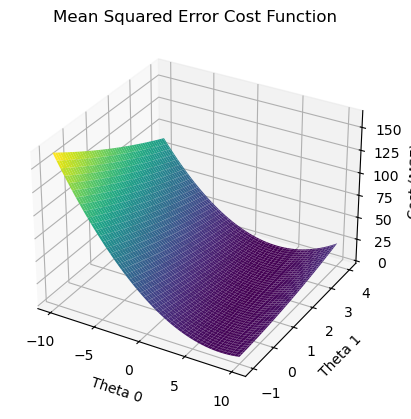

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Define the Mean Squared Error function
def mse(theta0, theta1, X, y):
    m = len(y)
    predictions = theta0 + theta1 * X
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Generate values for theta0 and theta1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Compute the cost function for each combination of theta0 and theta1
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = mse(theta0, theta1, X, y)

# Plot the cost function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, cmap='viridis')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost (MSE)')
ax.set_title('Mean Squared Error Cost Function')

plt.show()


#### 3. Stochastic Gradient Descent (SGD):

Description: A variant of gradient descent where the model parameters are updated for each training example, making it faster and suitable for large datasets.

1. Individual Processing:

SGD computes the gradient of the cost function using only a single training example at each update.

This means that for each update, SGD processes one training example at a time.

2. Update Rule:

The update rule for the parameters in SGD is: $$ \theta := \theta - \alpha \cdot \nabla J(\theta; x^{(i)}, y^{(i)}) $$ where 
∇
𝐽
(
𝜃
;
𝑥
(
𝑖
)
,
𝑦
(
𝑖
)
)
 is the gradient of the cost function with respect to 
𝜃
, calculated using the 
𝑖
-th training example 
(
𝑥
(
𝑖
)
,
𝑦
(
𝑖
)
)
, and 
𝛼
 is the learning rate.

3. Convergence:

Due to using a single training example per update, SGD has a more noisy and erratic path towards convergence compared to Gradient Descent.

This noise can sometimes help SGD escape local minima and find a better overall solution.

Typically converges faster in terms of iterations, making it more suitable for large datasets.

4. Complexity:

The computational complexity is 
𝑂
(
1
)
 for each iteration, making SGD very efficient for large datasets.

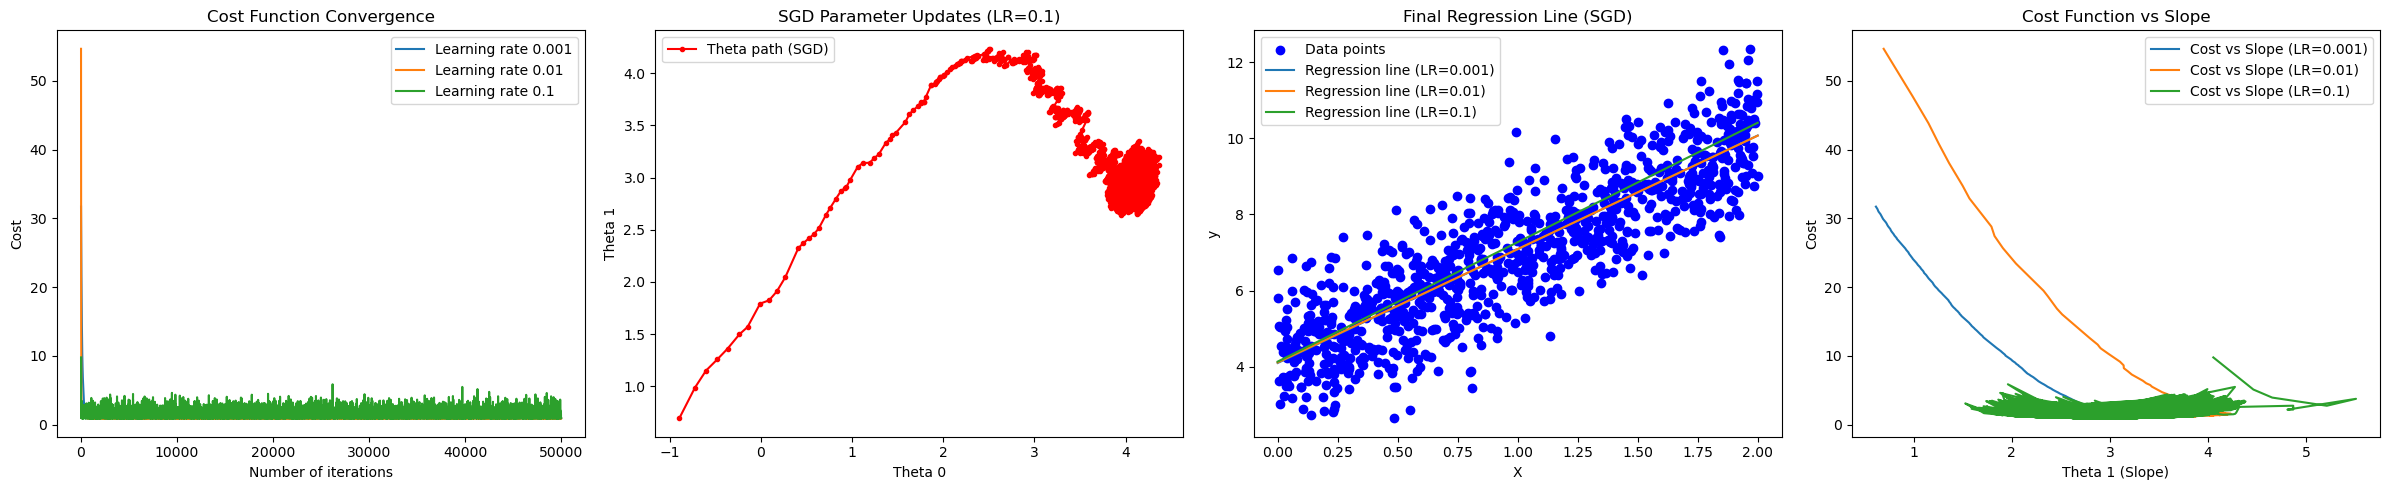

Optimal parameters (theta) using SGD with learning rate 0.001: [[4.0988702]
 [2.9875194]]
Optimal parameters (theta) using SGD with learning rate 0.01: [[4.11188108]
 [2.9792361 ]]
Optimal parameters (theta) using SGD with learning rate 0.1: [[4.13488013]
 [3.13740322]]


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(0)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Adding a bias term (intercept)
X_b = np.c_[np.ones((1000, 1)), X]

# SGD implementation
def stochastic_gradient_descent(X, y, learning_rate, n_iterations, batch_size=1):
    m = len(X)
    theta = np.random.randn(2, 1)
    cost_history = []
    theta_history = []

    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
            cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)
            cost_history.append(cost)
            theta_history.append(theta.copy())
    return theta, cost_history, theta_history

# Training with different learning rates
learning_rates = [0.001, 0.01, 0.1]
n_iterations = 50
results = []

for lr in learning_rates:
    theta, cost_history, theta_history = stochastic_gradient_descent(X_b, y, lr, n_iterations)
    results.append((lr, theta, cost_history, theta_history))

# Predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Plotting
plt.figure(figsize=(24, 5))

# Cost function convergence for different learning rates
plt.subplot(1, 4, 1)
for lr, _, cost_history, _ in results:
    plt.plot(range(len(cost_history)), cost_history, label=f'Learning rate {lr}')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()

# SGD parameter updates for a specific learning rate
theta_history_sgd = np.array(results[1][3])  # Using learning rate 0.1 for illustration
plt.subplot(1, 4, 2)
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 'r-o', markersize=3, label='Theta path (SGD)')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('SGD Parameter Updates (LR=0.1)')
plt.legend()

# Final regression line using SGD
plt.subplot(1, 4, 3)
plt.scatter(X, y, color='blue', label='Data points')
for lr, theta, _, _ in results:
    y_predict_sgd = X_new_b.dot(theta)
    plt.plot(X_new, y_predict_sgd, label=f'Regression line (LR={lr})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Regression Line (SGD)')
plt.legend()

# Cost function vs slope for a specific learning rate
plt.subplot(1, 4, 4)
for lr, _, cost_history, theta_history in results:
    theta_history = np.array(theta_history)
    plt.plot(theta_history[:, 1], cost_history, label=f'Cost vs Slope (LR={lr})')
plt.xlabel('Theta 1 (Slope)')
plt.ylabel('Cost')
plt.title('Cost Function vs Slope')
plt.legend()

plt.tight_layout()
plt.show()

for lr, theta, _, _ in results:
    print(f"Optimal parameters (theta) using SGD with learning rate {lr}: {theta}")


In [2]:
from sklearn.linear_model import SGDRegressor

# Fit SGD model
model = SGDRegressor(loss='squared_error',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,)


The possible values are 'squared_error', 'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'

- The 'squared_error' refers to the ordinary least squares fit.
- 'huber' modifies 'squared_error' to focus less on getting outliers correct by switching from squared to linear loss past a distance of
    epsilon. 
- 'epsilon_insensitive' ignores errors less than epsilon and is linear past that; this is the loss function used in SVR.
- 'squared_epsilon_insensitive' is the same but becomes squared loss past a tolerance of epsilon.

learning_rate : str, default='invscaling'
    
The learning rate schedule:

- 'constant': `eta = eta0`
- 'optimal': `eta = 1.0 / (alpha * (t + t0))`
  where t0 is chosen by a heuristic proposed by Leon Bottou.
- 'invscaling': `eta = eta0 / pow(t, power_t)`
- 'adaptive': eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.

### Parameters vs Hyperparameters in Regression

Parameters are the internal coefficients determined from the training data. They are adjusted during the training process and are used to make predictions on new data. In linear regression, parameters are the weights (coefficients) and biases (intercept).

##### Weights (Coefficients): 

The slope of the regression line for each independent variable.

##### Intercept (Bias): 

The point where the regression line intercepts the y-axis.

Mathematically, Linear Regresison formula is:

y = m1x1+m2x2+....+mnxn+c 

where c is intercept and m1, m2...mn are weights

Hyperparameters are external to the model and are set before the training process. They control the training process and help optimize the performance of the model. Unlike parameters, hyperparameters are not learned from the data; instead, they are specified by the user.

Common Hyperparameters in Regression:

1. Learning Rate:

Description: Controls how much the model's parameters are adjusted with respect to the gradient of the loss function. It determines the step size during optimization.

model = SGDRegressor(learning_rate=0.01)

Range of learning rate varies from 0.001 to 0.1

2. Regularization parameter(Alpha):

Description: Controls the complexity of the model by adding a penalty term to the loss function to prevent overfitting.

model = Ridge(alpha=1.0)

3. Number of Iterations (Epochs):

Description: The number of times the learning algorithm passes through the entire training dataset.

model = SGDRegressor(max_iter=1000)

4. Batch Size:

Description: The number of training examples used in one iteration of the gradient descent algorithm.

model = SGDRegressor(batch_size=32)

5. Solver:

Description: The optimization algorithm used to fit the model. Different solvers may be used for different types of problems and regularization methods.

model = LogisticRegression(solver='lbfgs')



In [ ]:
Hyperparameters in Specific Regression Models

- Linear Regression: Typically has no hyperparameters if using Ordinary Least Squares (OLS).

- Ridge Regression:
    - Alpha: Controls the strength of L2 regularization.
    - Solver: Algorithm used to optimize the model (e.g., 'auto', 'svd', 'cholesky').

- Lasso Regression:
    - Alpha: Controls the strength of L1 regularization.
    - Solver: Algorithm used to optimize the model (e.g., 'coordinate_descent').

- Elastic Net:
    - Alpha: Overall strength of the regularization.
    - L1 Ratio: Mix of L1 (Lasso) and L2 (Ridge) regularization.
    - Solver: Algorithm used to optimize the model (e.g., 'saga').

##### Tuning Hyperparameters

Hyperparameter tuning is the process of finding the best set of hyperparameters that result in the best performance of the model. Common methods for hyperparameter tuning include:

- Grid Search: Exhaustively searches through a specified subset of hyperparameters.

- Random Search: Randomly searches within a specified hyperparameter space.

- Bayesian Optimization: Uses Bayesian inference to find the best hyperparameters.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Sample data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [4, 5], [8, 9], [6, 4], [9, 9]])
y = np.array([0, 0, 1, 1, 1, 1, 1, 0])

# Define the model
model = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=2)
grid_search.fit(X, y)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')


Best hyperparameters: {'alpha': 100.0}


solver : {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg',             'sag', 'saga', 'lbfgs'}, default='auto'
    Solver to use in the computational routines:

    - 'auto' chooses the solver automatically based on the type of data.

    - 'svd' uses a Singular Value Decomposition of X to compute the Ridge
      coefficients. It is the most stable solver, in particular more stable
      for singular matrices than 'cholesky' at the cost of being slower.

    - 'cholesky' uses the standard scipy.linalg.solve function to
      obtain a closed-form solution.

    - 'sparse_cg' uses the conjugate gradient solver as found in
      scipy.sparse.linalg.cg. As an iterative algorithm, this solver is
      more appropriate than 'cholesky' for large-scale data
      (possibility to set `tol` and `max_iter`).

    - 'lsqr' uses the dedicated regularized least-squares routine
      scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative
      procedure.

    - 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses
      its improved, unbiased version named SAGA. Both methods also use an
      iterative procedure, and are often faster than other solvers when
      both n_samples and n_features are large. Note that 'sag' and
      'saga' fast convergence is only guaranteed on features with
      approximately the same scale. You can preprocess the data with a
      scaler from sklearn.preprocessing.

    - 'lbfgs' uses L-BFGS-B algorithm implemented in
      `scipy.optimize.minimize`. It can be used only when `positive`
      is True.

    All solvers except 'svd' support both dense and sparse data. However, only
    'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when
    `fit_intercept` is True.

### Evaluation Metrics

|Metric|	Definition	|Use Case| Formula |
|---------|---------|---------|-----------|
|MAE|	Average absolute difference between predicted and actual values|	Robust to outliers; straightforward measure|$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$|
|MSE|	Average squared difference between predicted and actual values|	Penalizes larger errors; sensitive to outliers|$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$|
|RMSE|	Square root of MSE|	Easier interpretation; sensitive to outliers| $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$|
|R-squared|	Proportion of variance explained|	Indicates model fit; higher values are better|$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$ |
|Adjusted R-squared|	Adjusted for number of predictors|	Compare models with different numbers of predictors|$$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right) $$|
|MAPE|	Mean absolute percentage error|	Easy to interpret as a percentage; sensitive to small values|$$ \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100 $$|
|SMAPE|Symmetric Mean Absolute Percentage Error|SMAPE is a variation of MAPE that adjusts for asymmetry in the error distribution. It provides a more balanced measure of error by normalizing the difference by the average of the actual and predicted values.|$$ \text{SMAPE} = \frac{1}{n} \sum_{i=1}^{n} \frac{|\hat{y_i} - y_i|}{(|\hat{y_i}| + |y_i|) / 2} \times 100 $$|
|MSLE|	Mean squared logarithmic error|	Penalizes underestimations; useful for wide range target values|$$ \text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + y_i) - \log(1 + \hat{y}_i) \right)^2 $$ |
|MBD|Mean Bias Deviation| MBD measures the average bias of the predictions, indicating whether the model tends to overestimate or underestimate the actual values. A positive MBD indicates overestimation, while a negative MBD indicates underestimation.|$$ \text{MBD} =  \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) $$|
|Prediction Intervals||Prediction intervals provide a range within which future observations are expected to fall with a certain probability (e.g., 95%). It measures the uncertainty associated with predictions.|$$ \hat{y} \pm t_{\alpha/2, n-2} \cdot \sqrt{\frac{\sigma^2}{n} + \frac{(x - \bar{x})2}{\sum_{i=1}{n} (x_i - \bar{x})^2}} $$|
|Theil's U||Theil's U is a measure of forecast accuracy that compares the forecasted values to the actual values, taking into account both bias and variance. A Theil’s U close to 0 indicates high forecast accuracy.|$$ \text{Theil's U} = \sqrt{\frac{\sum_{i=1}^{n} (\hat{y_i} - y_i)2}{\sum_{i=1}{n} (y_i - y_{i-1})^2}} $$|
|||||


### Usecases for Linear Regression

1. Predicting Housing Prices:

- Description: Estimating the price of a house based on features like square footage, number of bedrooms, location, and more.
- Example: Predicting house prices in a real estate market.

2. Sales Forecasting:

- Description: Predicting future sales based on historical sales data and other factors like marketing spend, seasonality, and economic indicators.
- Example: Forecasting monthly sales for a retail company.

3. Risk Assessment in Finance:
- Description: Estimating the risk of financial portfolios or predicting stock prices based on historical performance and other financial indicators.
- Example: Predicting the risk of loan default based on borrower characteristics.

4. Medical Cost Prediction:
- Description: Predicting healthcare costs based on patient characteristics, medical history, and treatment plans.
- Example: Estimating the cost of medical treatments for insurance purposes.

5. Energy Consumption Forecasting:
- Description: Predicting future energy usage based on historical consumption data, weather patterns, and other factors.
- Example: Forecasting electricity demand for utility companies.

6. Manufacturing Quality Control:
- Description: Predicting the quality or yield of a manufacturing process based on input variables like raw material quality, machine settings, and environmental conditions.
- Example: Estimating the defect rate in a production line.

7. Advertising Effectiveness:
- Description: Evaluating the impact of advertising spend on sales or other key performance indicators.
- Example: Determining the return on investment (ROI) for marketing campaigns.

8. Customer Lifetime Value (CLTV) Prediction:
- Description: Estimating the future value of a customer based on their past behavior and interactions with the business.
- Example: Predicting the CLTV for customers of a subscription-based service.

9. Salary Prediction:
- Description: Estimating employee salaries based on factors like education, experience, job role, and location.
- Example: Predicting the salary range for job candidates in a specific industry.

10. Market Research Analysis:
- Description: Analyzing survey data to understand the relationship between consumer characteristics and their purchasing behavior.
- Example: Predicting customer satisfaction scores based on survey responses and demographic data.